In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [4]:
#loading the dataset
df = pd.read_csv(r"C:\Users\T.B\Downloads\gld_price_data.csv")

In [5]:
df.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [6]:
df.shape

(2290, 6)

In [7]:
df.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [9]:
df.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

<Axes: >

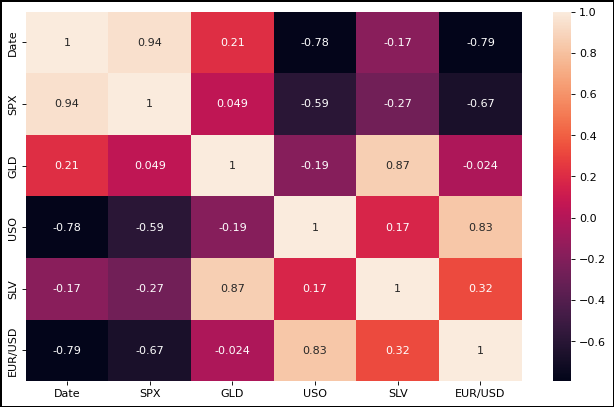

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])

# Correlation matrix
plt.figure(figsize=(10, 6), dpi=80, facecolor='w', edgecolor='k', linewidth=1, frameon=True)
sns.heatmap(df.corr(), annot=True)

<Axes: xlabel='GLD', ylabel='Count'>

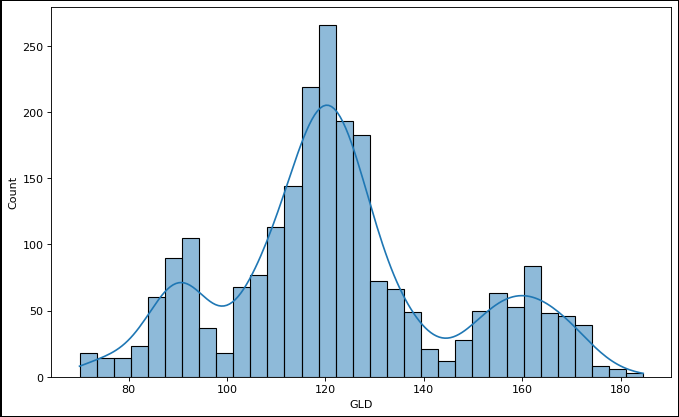

In [14]:
# displaying the distribution of the target variable
plt.figure(figsize=(10, 6), dpi=80, facecolor='w', edgecolor='k', linewidth=1, frameon=True)
sns.histplot(df['GLD'], kde=True)

In [15]:
# splitting the data into features and target variable
X = df.drop(['Date', 'GLD'], axis=1)
y = df['GLD']

In [16]:
#splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
# model training
model = RandomForestRegressor(n_estimators=100, random_state=42)


In [19]:
model.fit(X_train, y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [21]:
y_predict = model.predict(X_test)

In [22]:
# Evaluate model 
mean_squared_error = mean_squared_error(y_test, y_predict)
r2_score = r2_score(y_test, y_predict)

print(f'Mean Squared Error: {mean_squared_error}')
print(f'R^2 Score: {r2_score}')


Mean Squared Error: 5.469544524374734
R^2 Score: 0.9900245384549384


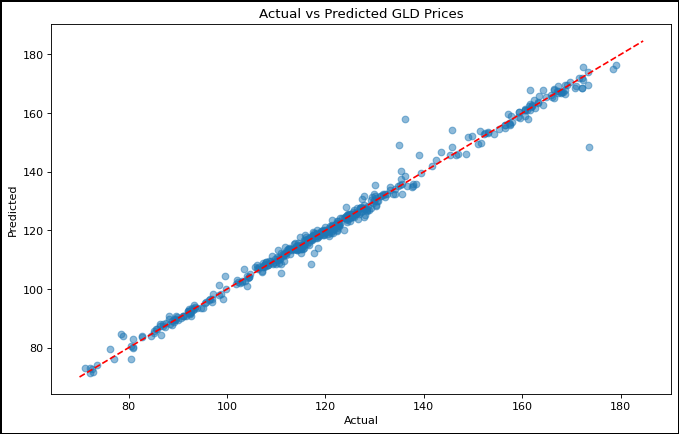

In [23]:
# Comparing actual vs predicted values
plt.figure(figsize=(10, 6), dpi=80, facecolor='w', edgecolor='k', linewidth=1, frameon=True)
plt.scatter(y_test, y_predict, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted GLD Prices')
plt.show()

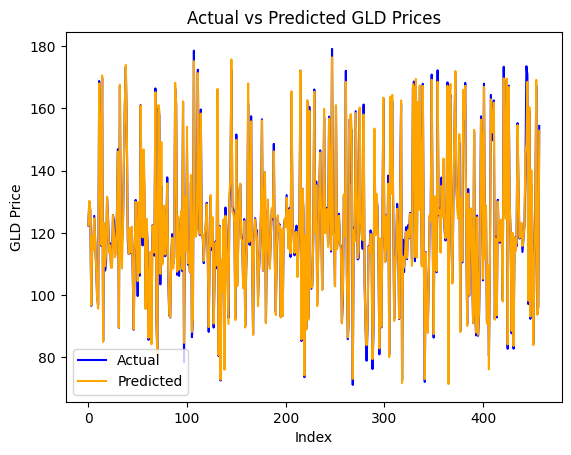

In [24]:
plt.plot(y_test.values, label='Actual', color='blue')
plt.plot(y_predict, label='Predicted', color='orange')
plt.xlabel('Index')
plt.ylabel('GLD Price')
plt.title('Actual vs Predicted GLD Prices')
plt.legend()
plt.show()
